In [ ]:
#!pip install sounddevice 

In [ ]:
''''!apt-get install -y portaudio19-dev
!pip install pyaudio'''

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

C:\Users\soumi\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [ ]:
'''import os
for dirname, _, filenames in os.walk("F:/Docs/Data Science/Projects/TESS Toronto emotional speech set data"):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

In [2]:
import random

paths = []
labels = []

# Collect paths and labels
for dirname, _, filenames in os.walk("F:/Docs/Data Science/Projects/TESS Toronto emotional speech set data"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())

# Combine paths and labels into a list of tuples
data = list(zip(paths, labels))

# Shuffle the data
random.shuffle(data)

# Unzip the shuffled data into paths and labels
paths, labels = zip(*data)

# Print the loaded dataset
print('Dataset is Loaded')

Dataset is Loaded


In [59]:
paths[:5]

('F:/Docs/Data Science/Projects/TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_Pleasant_surprise\\OAF_sour_ps.wav',
 'F:/Docs/Data Science/Projects/TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\YAF_happy\\YAF_hole_happy.wav',
 'F:/Docs/Data Science/Projects/TESS Toronto emotional speech set data\\OAF_disgust\\OAF_whip_disgust.wav',
 'F:/Docs/Data Science/Projects/TESS Toronto emotional speech set data\\OAF_neutral\\OAF_witch_neutral.wav',
 'F:/Docs/Data Science/Projects/TESS Toronto emotional speech set data\\OAF_angry\\OAF_talk_angry.wav')

In [60]:
labels[:5]

('ps', 'happy', 'disgust', 'neutral', 'angry')

In [3]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,F:/Docs/Data Science/Projects/TESS Toronto emo...,sad
1,F:/Docs/Data Science/Projects/TESS Toronto emo...,happy
2,F:/Docs/Data Science/Projects/TESS Toronto emo...,fear
3,F:/Docs/Data Science/Projects/TESS Toronto emo...,neutral
4,F:/Docs/Data Science/Projects/TESS Toronto emo...,happy


In [4]:
count=df['label'].value_counts()
count

sad        800
happy      800
fear       800
neutral    800
angry      800
ps         800
disgust    800
Name: label, dtype: int64

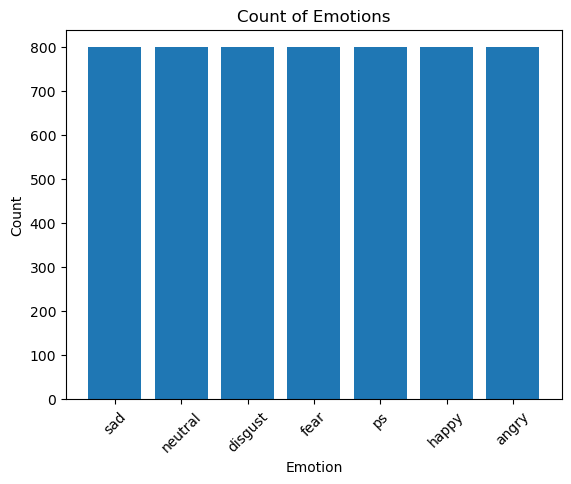

In [10]:
# Plot the bar chart
plt.bar(count.index, count.values)

# Set the labels and title
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Count of Emotions')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the chart
plt.show()

In [5]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

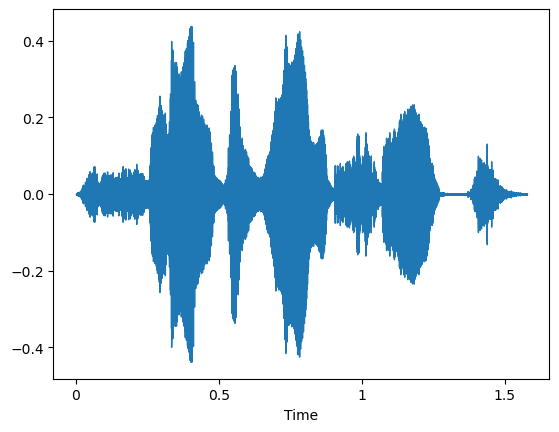

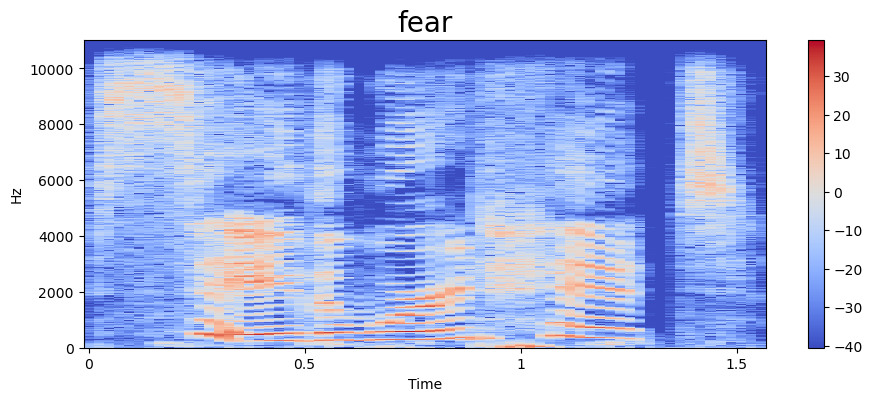

In [6]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)


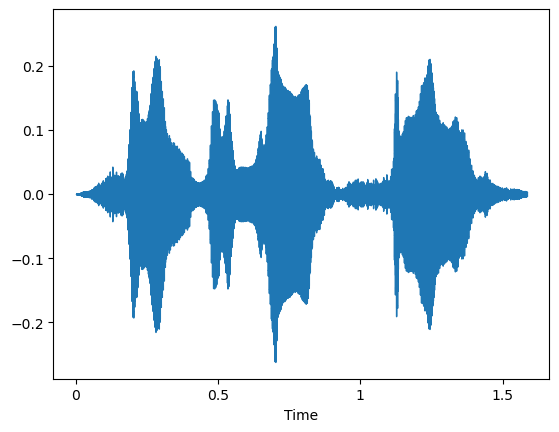

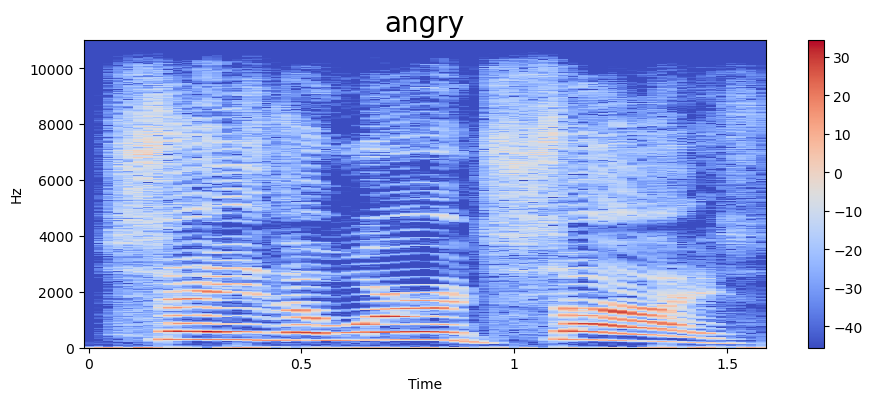

In [7]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)


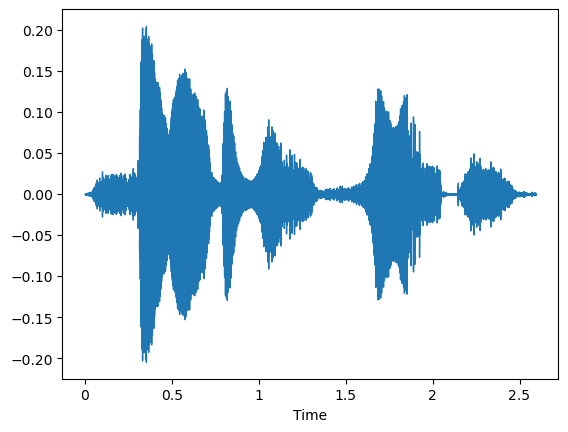

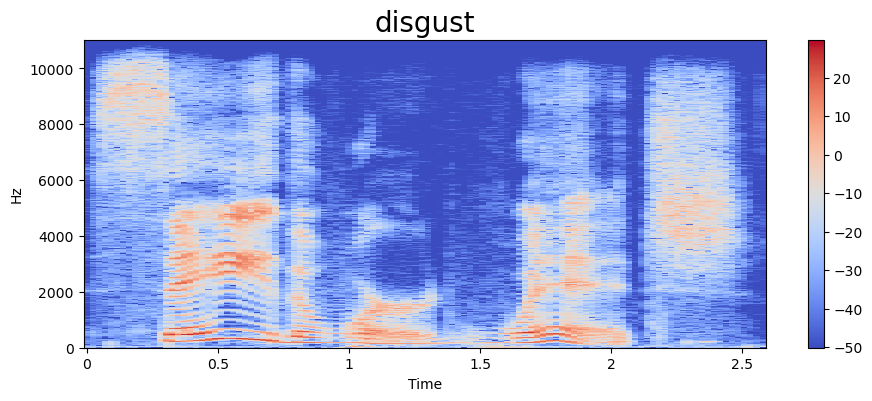

In [8]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)


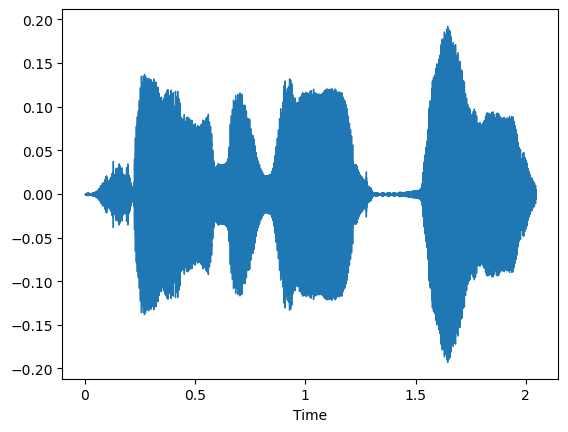

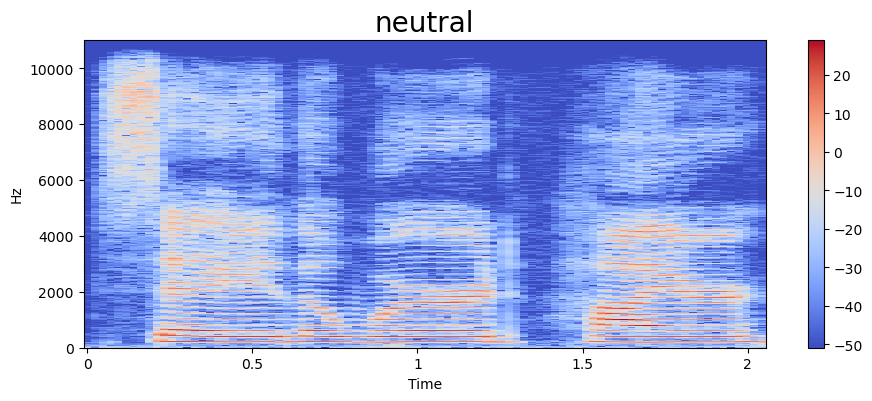

In [9]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

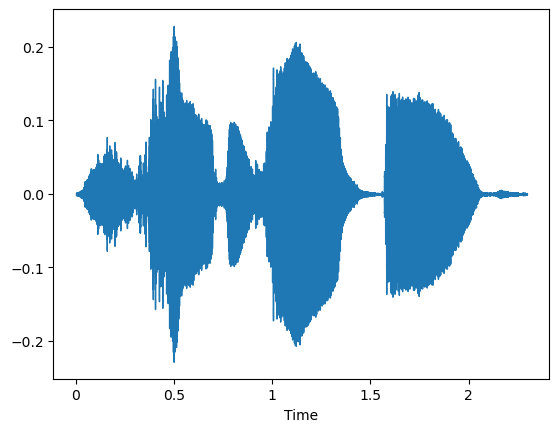

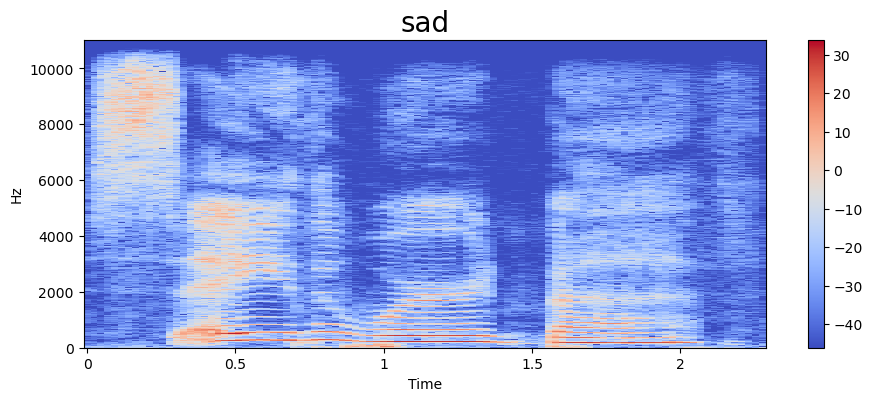

In [10]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

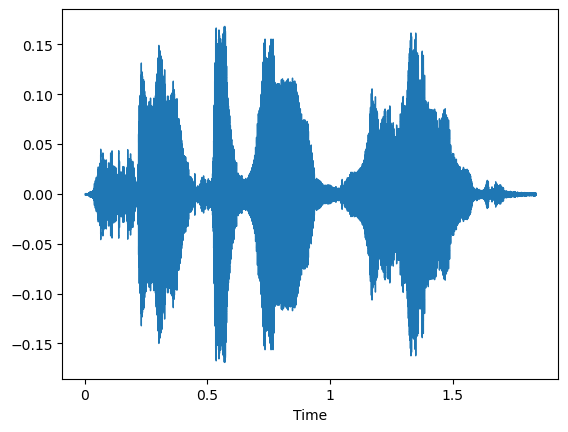

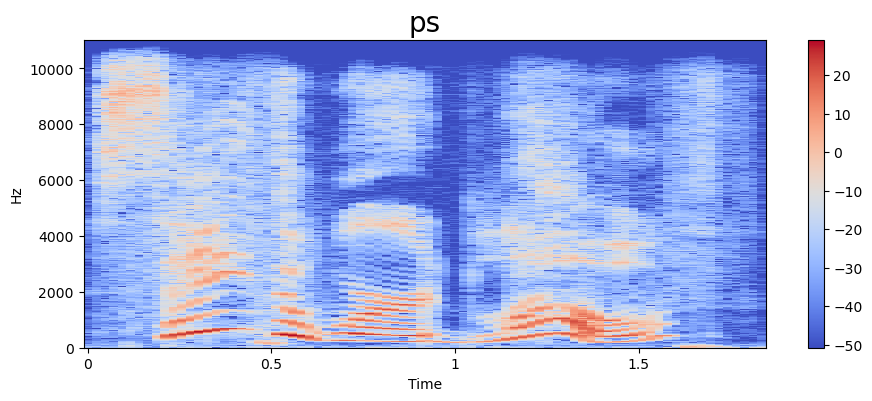

In [11]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

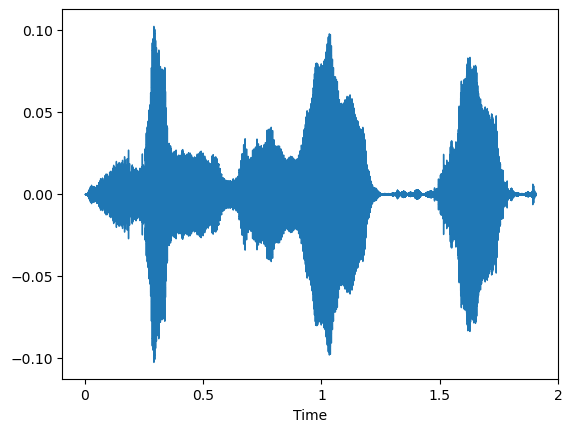

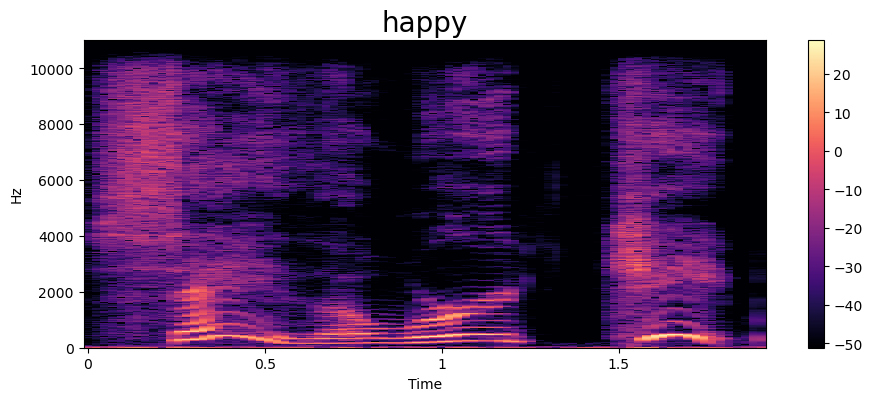

In [13]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [14]:
# Extract MFCC features
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [15]:
extract_mfcc(df['speech'][0])

array([-4.1049011e+02,  8.8772163e+01,  2.1828569e+01,  4.1443596e+01,
        8.7886820e+00,  4.7206154e+00, -3.7053356e+00, -7.9972572e+00,
        2.6318600e+00, -1.1099881e+01, -4.5690780e+00,  2.6588597e+00,
       -6.1916451e+00,  7.7711535e+00, -6.9864626e+00,  1.8066467e+00,
        9.2294134e-02, -1.8079611e+00, -8.5120239e+00, -5.4107337e+00,
       -7.6093426e+00, -7.3041325e+00, -4.1036210e+00,  4.4851909e+00,
       -6.3323700e-01,  6.2569165e+00, -4.0458463e-02, -4.5984644e-01,
       -2.8028738e+00, -8.7201111e-02,  3.5610790e+00,  9.7027369e+00,
        8.0138102e+00,  7.0917106e+00,  2.2896051e+00,  1.7699088e+00,
        2.1442699e+00,  1.8037627e+00,  4.5065241e+00,  2.8193400e+00],
      dtype=float32)

In [16]:
# Perform train-test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [17]:
X_train = np.array(train_df['speech'].apply(lambda x: extract_mfcc(x)).tolist())
X_test = np.array(test_df['speech'].apply(lambda x: extract_mfcc(x)).tolist())

In [16]:
X_train = np.array([extract_mfcc(x) for x in train_df['speech']])
X_test = np.array([extract_mfcc(x) for x in test_df['speech']])

In [18]:
# Reshape the input
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [19]:
# Encode the labels
enc = OneHotEncoder()
y_train = enc.fit_transform(train_df[['label']]).toarray()
y_test = enc.transform(test_df[['label']]).toarray()

import pickle
# Save the encoder
with open('TESS_encoder.pkl', 'wb') as f:
    pickle.dump(enc, f)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
# Define the model
model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

In [21]:
# Train the model
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=512, shuffle=True, callbacks=[early_stopping])

Epoch 1/100
9/9 [==============================] - 11s 471ms/step - loss: 2.0112 - accuracy: 0.3125 - val_loss: 1.8479 - val_accuracy: 0.3973
Epoch 2/100
9/9 [==============================] - 3s 317ms/step - loss: 1.1779 - accuracy: 0.5692 - val_loss: 1.7346 - val_accuracy: 0.4473
Epoch 3/100
9/9 [==============================] - 3s 286ms/step - loss: 0.9170 - accuracy: 0.6618 - val_loss: 1.6397 - val_accuracy: 0.5241
Epoch 4/100
9/9 [==============================] - 3s 297ms/step - loss: 0.7703 - accuracy: 0.7297 - val_loss: 1.5492 - val_accuracy: 0.5964
Epoch 5/100
9/9 [==============================] - 3s 320ms/step - loss: 0.6443 - accuracy: 0.7839 - val_loss: 1.4791 - val_accuracy: 0.5946
Epoch 6/100
9/9 [==============================] - 3s 279ms/step - loss: 0.5586 - accuracy: 0.8183 - val_loss: 1.3944 - val_accuracy: 0.5982
Epoch 7/100
9/9 [==============================] - 3s 287ms/step - loss: 0.4771 - accuracy: 0.8504 - val_loss: 1.2503 - val_accuracy: 0.6812
Epoch 8/100


In [22]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

35/35 [==============================] - 1s 22ms/step - loss: 0.1822 - accuracy: 0.9866
Test Loss: 0.1821870356798172
Test Accuracy: 0.9866071343421936


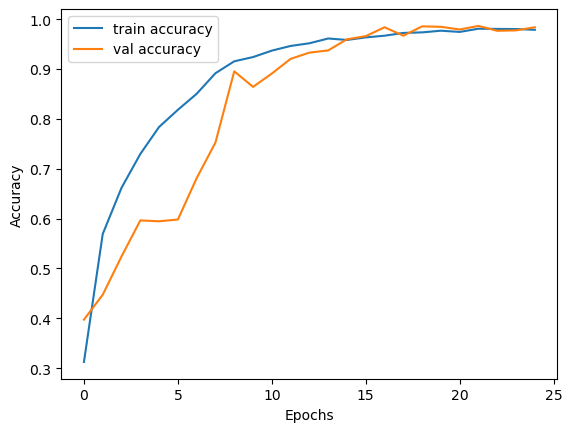

In [23]:
##Plot the results
acc = history.history['accuracy']
val_acc= history.history['val_accuracy']
epochs = list(range(len(acc)))  # Use the number of epochs as the x-axis values

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
print('Accuracy: %.2f%%' % (val_acc[-1] * 100))

Accuracy: 98.39%


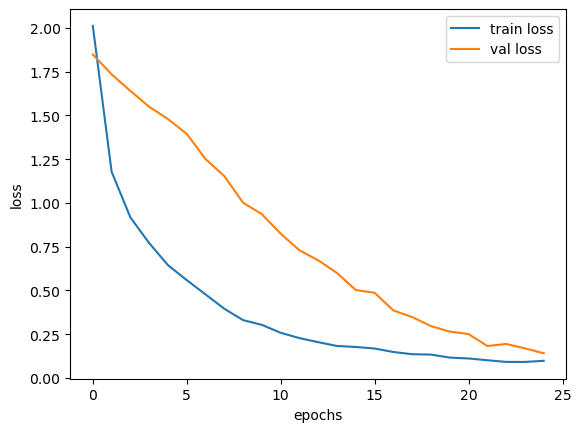

In [25]:
##Plot the results
loss = history.history['loss']
val_loss= history.history['val_loss']

plt.plot(epochs, loss, label= 'train loss')
plt.plot(epochs, val_loss, label= 'val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Test Results

In [26]:
# Load the audio file
new_audio_path = "F:/Docs/Data Science/Projects/TESS Toronto emotional speech set data/YAF_disgust/YAF_back_disgust.wav"
new_audio, sr = librosa.load(new_audio_path, duration=3, offset=0.5)

# Extract MFCC features for the new audio file
new_mfcc = np.mean(librosa.feature.mfcc(y=new_audio, sr=sr, n_mfcc=40).T, axis=0)
new_mfcc = np.expand_dims(new_mfcc, axis=0)
new_mfcc = np.expand_dims(new_mfcc, axis=-1)

# Make a prediction using the trained model
prediction = model.predict(new_mfcc)
predicted_label = enc.inverse_transform(prediction)
print("The predicted emotion is:", predicted_label[0][0].upper())

1/1 [==============================] - 1s 989ms/step
The predicted emotion is: DISGUST


In [27]:

new_audio_path = "C:/Users/soumi/OneDrive/Desktop/test audio/OAF_bar_angry.wav"
new_audio, sr = librosa.load(new_audio_path, duration=3, offset=0.5)

# Extract MFCC features for the new audio file
new_mfcc = np.mean(librosa.feature.mfcc(y=new_audio, sr=sr, n_mfcc=40).T, axis=0)
new_mfcc = np.expand_dims(new_mfcc, axis=0)
new_mfcc = np.expand_dims(new_mfcc, axis=-1)

# Make a prediction using the trained model
prediction = model.predict(new_mfcc)
predicted_label = enc.inverse_transform(prediction)
print("The predicted emotion is:", predicted_label[0][0].upper())

1/1 [==============================] - 0s 53ms/step
The predicted emotion is: ANGRY


<font
size="5">**New Data**</font>

In [10]:
import sounddevice as sd
import numpy as np
import librosa
from tensorflow.keras.models import load_model
import joblib
# Set the duration and sample rate
duration = 2

# Record audio with dynamic sampling rate
recording = sd.rec(int(duration * sd.query_devices(None, 'input')['default_samplerate']), channels=1)
print("Recording audio...")

# Wait for recording to complete
sd.wait()

# Extract MFCC features for the recorded audio
audio_data = np.squeeze(recording)
sample_rate = sd.query_devices(None, 'input')['default_samplerate']
mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40).T

# Reshape the audio to match the expected input shape of the model
reshaped_audio = np.resize(mfcc_features, (40, 1))

# Load the model
model = load_model("C:/Users/soumi/Downloads/TESS_latest_trained_model.h5")
import joblib

# Load the encoder
enc = joblib.load("C:/Users/soumi/Downloads/TESS_encoder.pkl")

# Make a prediction using the reshaped audio
reshaped_audio = np.expand_dims(reshaped_audio, axis=0)
prediction = model.predict(reshaped_audio)
predicted_label = enc.inverse_transform(prediction)
print("The predicted emotion is:", predicted_label[0][0].upper())

# Play the recorded audio
print("Playing audio...")
sd.play(recording.flatten(), sample_rate)
sd.wait()

Recording audio...
1/1 [==============================] - 1s 750ms/step
The predicted emotion is: FEAR
Playing audio...


In [40]:
saved=model.save('TESS_latest_trained_model.h5')

In [55]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import librosa
import numpy as np
import base64
import pickle
import sounddevice as sd
from scipy.io.wavfile import write
from tensorflow.keras.models import load_model
import os
import plotly.graph_objects as go

# Create the Dash app
app = dash.Dash(__name__, title='Toronto Speech Emotion Recognizer')

# Create the uploaded_audio directory if it doesn't exist
if not os.path.exists("uploaded_audio"):
    os.makedirs("uploaded_audio")

app.layout = html.Div(
    style={'backgroundColor': 'LightBlue', 'padding': '30px'},
    children=[
        html.H1(
            "Emotion Prediction",
            style={'textAlign': 'center', 'color': '333', 'fontFamily': 'Arial, sans-serif'}
        ),
        dcc.Upload(
            id='upload-audio',
            children=html.Div([
                'Drag and Drop or ',
                html.A('Select Audio File')
            ]),
            style={
                'width': '50%',
                'height': '60px',
                'lineHeight': '60px',
                'borderWidth': '2px',
                'borderStyle': 'dashed',
                'borderRadius': '5px',
                'textAlign': 'center',
                'margin': '10px',
                'backgroundColor': 'Gold',
                'color': '333',
                'fontFamily': 'Arial, sans-serif'
            },
            multiple=False
        ),
        html.Button(
            'Record Audio',
            id='record-audio-button',
            style={'margin': '10px'}
        ),
        html.Div(
            id='output-prediction',
            style={'marginTop': '20px', 'fontFamily': 'Arial sans-serif', 'fontSize': '20px'}
        ),
        dcc.Graph(
            id='spectrogram-graph',
            style={'marginTop': '20px'}
        )
    ]
)


def extract_mfcc(audio, sr):
    duration = 3  # adjust duration if necessary
    offset = 0.5  # adjust offset if necessary

    audio, _ = librosa.load(audio, sr=sr, duration=duration, offset=offset)
    mfcc = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40).T, axis=0)
    mfcc = np.expand_dims(mfcc, axis=0)
    mfcc = np.expand_dims(mfcc, axis=-1)
    return mfcc



@app.callback(
    dash.dependencies.Output('output-prediction', 'children'),
    dash.dependencies.Output('spectrogram-graph', 'figure'),
    [dash.dependencies.Input('upload-audio', 'contents')],
    [dash.dependencies.State('upload-audio', 'filename')],
    [dash.dependencies.Input('record-audio-button', 'n_clicks')]
)
def predict_emotion(contents, filename, n_clicks):
    if contents is not None:
        content_type, content_string = contents.split(',')

        audio_path = f"./uploaded_audio/{filename}"
        with open(audio_path, 'wb') as f:
            f.write(base64.b64decode(content_string))

        audio, sr = librosa.load(audio_path, sr=None)  # Load audio with original sample rate
    elif n_clicks is not None and n_clicks > 0:
        # Recording parameters
        duration = 3  # adjust duration if necessary
        default_sr = sd.query_devices(None, 'input')['default_samplerate']
        channels = 1

        print("Recording started...")
        audio = sd.rec(int(duration * default_sr), samplerate=default_sr, channels=channels)
        sd.wait()  # Wait until recording is finished
        print("Recording finished.")

        # Save the recorded audio to a file
        audio_path = "./uploaded_audio/recorded_audio.wav"
        write(audio_path, default_sr, audio)

        sr = default_sr  # Use the default sample rate for MFCC extraction
    else:
        return '', {}

    # Perform emotion prediction
    mfcc_features = extract_mfcc(audio_path, sr)
    prediction = model.predict(mfcc_features)
    predicted_label = enc.inverse_transform(prediction)
    predicted_emotion = predicted_label[0][0].upper()

    # Generate spectrogram
    _, _, spectrogram = librosa.reassigned_spectrogram(audio, sr=sr)

    fig = go.Figure(data=go.Heatmap(
        z=spectrogram,
        colorscale='Hot',
    ))

    fig.update_layout(
        title='Spectrogram',
        xaxis_title='Time',
        yaxis_title='Frequency',
    )

    return (
        html.H3(
            f"The predicted emotion is: {predicted_emotion}",
            style={'color': 'red', 'textAlign': 'center'}
        ),
        fig
    )


    # Perform emotion prediction
    mfcc_features = extract_mfcc(audio_path, sr)
    prediction = model.predict(mfcc_features)
    predicted_label = enc.inverse_transform(prediction)
    predicted_emotion = predicted_label[0][0].upper()

    # Generate spectrogram
    _, _, spectrogram = librosa.reassigned_spectrogram(audio, sr=sr)

    fig = go.Figure(data=go.Heatmap(
        z=spectrogram,
        colorscale='Hot',
    ))

    fig.update_layout(
        title='Spectrogram',
        xaxis_title='Time',
        yaxis_title='Frequency',
    )

    return (
        html.H3(
            f"The predicted emotion is: {predicted_emotion}",
            style={'color': 'red', 'textAlign': 'center'}
        ),
        fig
    )


if __name__ == "__main__":
    # Load the trained model and encoder
    model = load_model("C:/Users/soumi/Downloads/TESS_latest_trained_model.h5")  # Replace with your trained model file path

    with open("C:/Users/soumi/Downloads/TESS_encoder.pkl", 'rb') as f:
        enc = pickle.load(f)

    app.run_server(debug=False, port=1540)


Dash is running on http://127.0.0.1:1540/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:1540
Press CTRL+C to quit
127.0.0.1 - - [21/May/2023 13:26:12] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/May/2023 13:26:12] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [21/May/2023 13:26:12] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [21/May/2023 13:26:12] "GET /_dash-component-suites/dash/dcc/async-upload.js HTTP/1.1" 304 -
127.0.0.1 - - [21/May/2023 13:26:12] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [21/May/2023 13:26:12] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [21/May/2023 13:26:12] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -


1/1 [==============================] - 1s 635ms/step


127.0.0.1 - - [21/May/2023 13:26:16] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [21/May/2023 13:26:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/May/2023 13:26:34] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [21/May/2023 13:26:34] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [21/May/2023 13:26:34] "GET /_dash-component-suites/dash/dcc/async-upload.js HTTP/1.1" 304 -
127.0.0.1 - - [21/May/2023 13:26:34] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [21/May/2023 13:26:34] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [21/May/2023 13:26:34] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -


In [ ]:
ii